<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Linear%20Regression/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

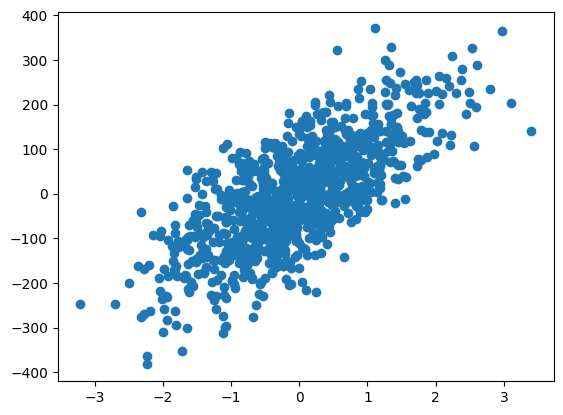

In [189]:
import matplotlib.pyplot as plt
x,y=make_regression(n_samples=1000,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)
plt.scatter(x,y)

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)

print(lr.coef_,lr.intercept_)

[87.92927623] 2.246861772134187


In [173]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))

np.float64(0.5212485901605136)

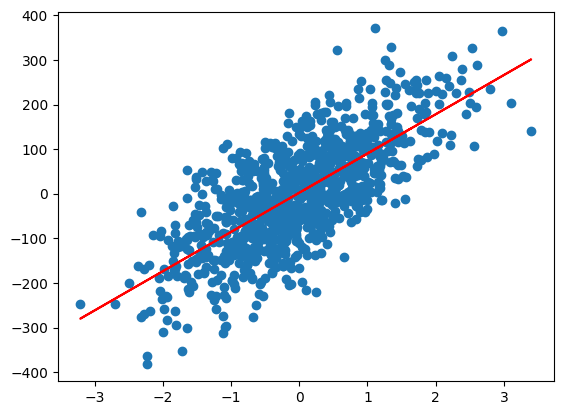

In [174]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

**Assume slop is constant 87.92 , and start from a random value b=400**

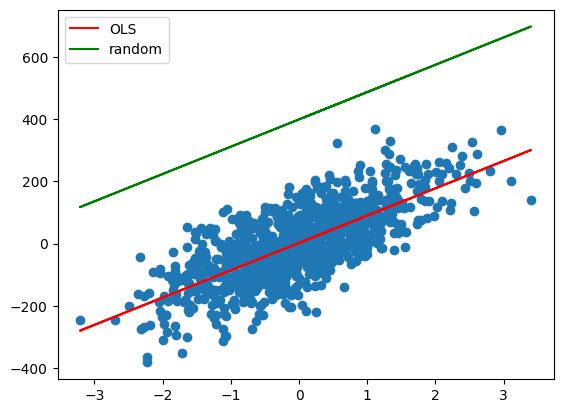

In [175]:
y_pred=((87.92*x)+400).reshape(1000)

plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='green',label='random')
plt.legend()
plt.show()

In [176]:
m=87.92
b=400
learning_rate=0.0001

636405.3477641003
256.8087967530774


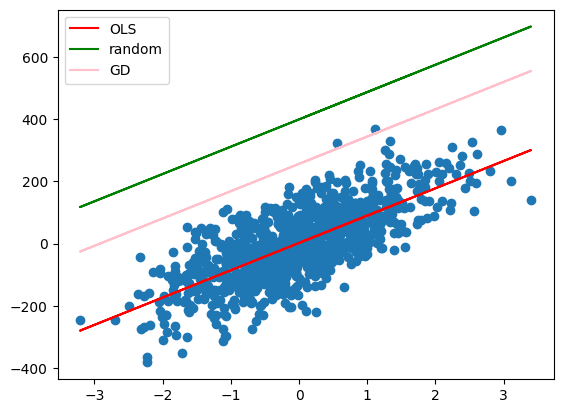

In [178]:

loss_slop= -2*np.sum(y-m*x.ravel()-b)
print(loss_slop)

step_size=learning_rate * loss_slop

b=b-step_size
print(b)

y_pred=((87.92*x)+b).reshape(1000)
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,((87.92*x)+400).reshape(1000),color='green',label='random')
plt.plot(x,y_pred,color='pink',label='GD')
plt.legend()
plt.show()

b is ->  2.2995281352444974


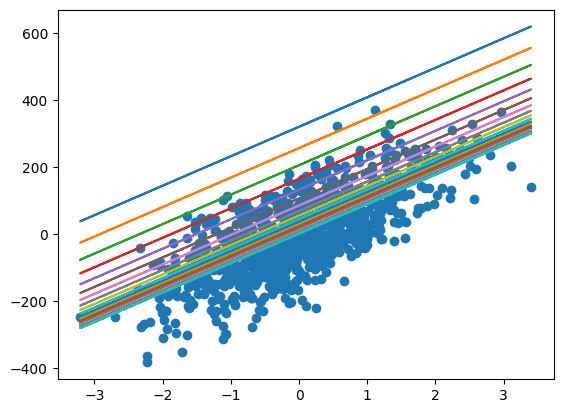

In [179]:
m=87.92
b=400
learning_rate=0.0001
epochs=40

plt.scatter(x,y)

for i in range(epochs):
  loss_slop= -2*np.sum(y-m*x.ravel()-b)
  step_size=learning_rate * loss_slop
  b=b-step_size
  y_pred=m*x+b
  plt.plot(x,y_pred)

print('b is -> ',b)

##  Own  Custom Gradient Descent class

In [184]:
class GDRegressor:
  def __init__(self,learning_rate,epochs):
    self.learning_rate=learning_rate
    self.epochs=epochs
    self.m=180
    self.b=400

  def fit(self,x,y):
    for i in range(self.epochs):

        loss_slop_b= -2*np.sum(y-self.m*x.ravel()-self.b)
        self.b=self.b-(self.learning_rate * loss_slop_b)

        loss_slop_m= -2*np.sum((y-self.m*x.ravel()-self.b)*x.ravel())
        self.m=self.m-(self.learning_rate * loss_slop_m)
    print(self.b,self.m)

  def predict(self,x):
     y_pred=self.m*x+self.b
     return y_pred


In [185]:
gd=GDRegressor(0.0001,40)

gd.fit(x,y)

2.3039826042085427 87.95694482634131


In [187]:
from sklearn.metrics import r2_score
r2_score(y,gd.predict(x))

0.5356545415150357